### DATASETS

In [ ]:
# [datasets]  https://data.mendeley.com/datasets/jxwvdwhpc2/1


## EDA DEL DATASETS

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## VISUALIZACION TIPOS DE CÁNCER

### Representación de una imagen por clase

In [ ]:
# import os
# import random

# # Carpeta principal donde están las imágenes
# base_path = "/content/drive/My Drive/Colab Notebooks/clasificacion multiclase"

# # Rutas de imágenes y sus etiquetas
# image_paths = []
# labels = []

# # Clases (nombres de carpetas)
# clases = set()

# for carpeta_grupo in os.listdir(base_path):
#     ruta_grupo = os.path.join(base_path, carpeta_grupo)
#     if not os.path.isdir(ruta_grupo):
#         continue  # Si no es carpeta, la saltamos

#     for nombre_clase in os.listdir(ruta_grupo):
#         ruta_clase = os.path.join(ruta_grupo, nombre_clase)
#         if os.path.isdir(ruta_clase):
#             clases.add(nombre_clase)

# clases = sorted(list(clases))
# print("Clases encontradas:", clases)

# # Creamos un número para cada clase
# class_map = {nombre: i for i, nombre in enumerate(clases)}

# # Guardar las imágenes de cada clase
# imagenes_por_clase = {}

# for carpeta_grupo in os.listdir(base_path):
#     ruta_grupo = os.path.join(base_path, carpeta_grupo)
#     if not os.path.isdir(ruta_grupo):
#         continue

#     for nombre_clase in os.listdir(ruta_grupo):
#         ruta_clase = os.path.join(ruta_grupo, nombre_clase)
#         if not os.path.isdir(ruta_clase):
#             continue

#         # Lista de imágenes de esta clase
#         imagenes = [
#             os.path.join(ruta_clase, img)
#             for img in os.listdir(ruta_clase)
#             if img.lower().endswith((".jpg", ".jpeg", ".png"))
#         ]

#         if nombre_clase not in imagenes_por_clase:
#             imagenes_por_clase[nombre_clase] = []

#         imagenes_por_clase[nombre_clase].extend(imagenes)

# # Mostrar cuántas imágenes tiene cada clase
# for clase, lista in imagenes_por_clase.items():
#     print(f"Clase '{clase}': {len(lista)} imágenes")

# # Encontrar la clase con menos imágenes (para balancear)
# minimo_imagenes = min(len(lista) for lista in imagenes_por_clase.values())
# print(f"\nNúmero mínimo de imágenes por clase: {minimo_imagenes}")

# # Seleccionar aleatoriamente el mismo número de imágenes de cada clase
# for clase, lista in imagenes_por_clase.items():
#     seleccionadas = random.sample(lista, minimo_imagenes)
#     # seleccionadas = random.sample(lista, 100)
#     image_paths.extend(seleccionadas)
#     labels.extend([class_map[clase]] * minimo_imagenes)
#     # labels.extend([class_map[clase]] * 100)

# # Verificación final
# print(f"\nTotal de imágenes seleccionadas: {len(image_paths)}")
# print(f"Total de etiquetas: {len(labels)}")

# for clase, idx in class_map.items():
#     cantidad = labels.count(idx)
#     print(f"Clase '{clase}': {cantidad} imágenes")


Clases encontradas: ['adenosis', 'ductal_carcinoma', 'fibroadenoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma', 'phyllodes_tumor', 'tubular_adenoma']
Clase 'tubular_adenoma': 569 imágenes
Clase 'phyllodes_tumor': 453 imágenes
Clase 'ductal_carcinoma': 3460 imágenes
Clase 'lobular_carcinoma': 626 imágenes
Clase 'fibroadenoma': 1014 imágenes
Clase 'mucinous_carcinoma': 792 imágenes
Clase 'adenosis': 444 imágenes
Clase 'papillary_carcinoma': 560 imágenes

Número mínimo de imágenes por clase: 444

Total de imágenes seleccionadas: 3552
Total de etiquetas: 3552
Clase 'adenosis': 444 imágenes
Clase 'ductal_carcinoma': 444 imágenes
Clase 'fibroadenoma': 444 imágenes
Clase 'lobular_carcinoma': 444 imágenes
Clase 'mucinous_carcinoma': 444 imágenes
Clase 'papillary_carcinoma': 444 imágenes
Clase 'phyllodes_tumor': 444 imágenes
Clase 'tubular_adenoma': 444 imágenes


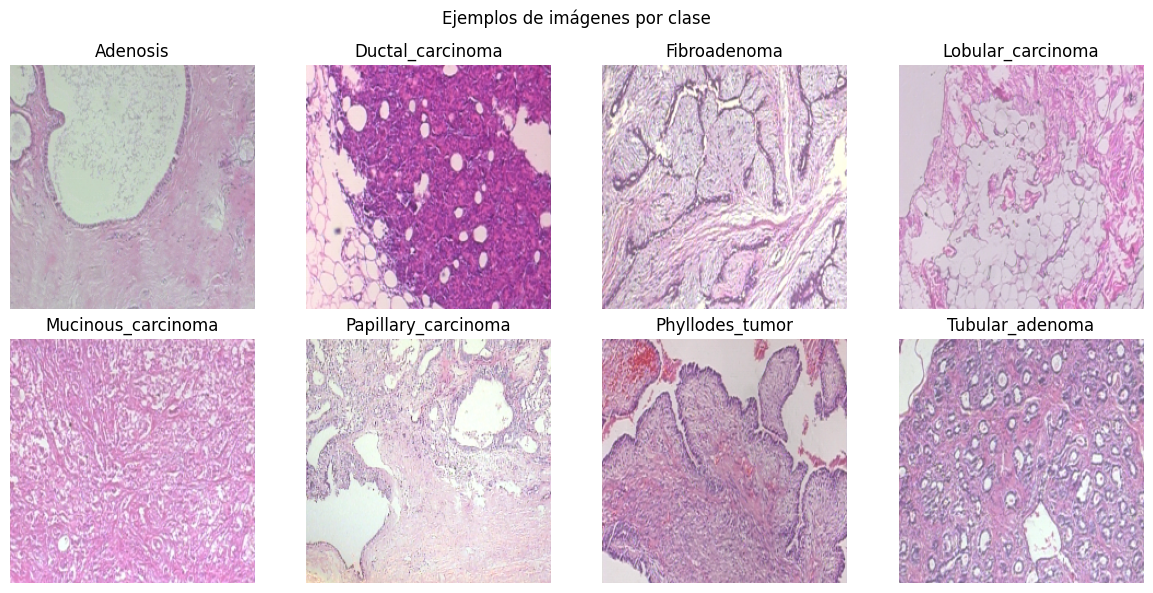

In [ ]:
# import os
# import random
# import matplotlib.pyplot as plt
# from PIL import Image

# # Número de clases
# num_class = len(class_map)
# n_cols = 4
# n_rows = (num_class + n_cols - 1) // n_cols

# plt.figure(figsize=(n_cols * 3, n_rows * 3))

# # Recorrer cada clase por nombre
# for idx, class_name in enumerate(class_map.keys()):
#     class_path = None
#     for group in os.listdir(base_path):
#         group_path = os.path.join(base_path, group)
#         potential_path = os.path.join(group_path, class_name)
#         if os.path.isdir(potential_path):
#             class_path = potential_path
#             break

#     if class_path is None:
#         print(f"No se encontró carpeta para clase {class_name}")
#         continue

#     # Listar imágenes en esa carpeta
#     images = [
#         img for img in os.listdir(class_path)
#         if img.lower().endswith(('.jpg', '.jpeg', '.png'))
#     ]

#     if not images:
#         print(f"No hay imágenes en: {class_path}")
#         continue

#     # Imagen aleatoria
#     imagen_random = random.choice(images)
#     imagen_path = os.path.join(class_path, imagen_random)
#     # print(imagen_path)
#     imagen = Image.open(imagen_path)

#     plt.subplot(n_rows, n_cols, idx + 1)
#     plt.imshow(imagen)
#     plt.title(class_name.capitalize())
#     plt.axis('off')

# plt.suptitle("Ejemplos de imágenes por clase")
# plt.tight_layout()
# plt.show()


## MODELOS CNN

In [2]:
import os
import random
import torch

# ==============================
#  Configuración
# ==============================
base_path = "/content/drive/My Drive/Colab Notebooks/clasificacion multiclase"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Usando dispositivo:", device)

# ==============================
# Crear lista de imágenes y etiquetas
# ==============================
image_paths = []
labels = []
clases = set()

for carpeta_grupo in os.listdir(base_path):
    ruta_grupo = os.path.join(base_path, carpeta_grupo)
    if not os.path.isdir(ruta_grupo):
        continue
    for nombre_clase in os.listdir(ruta_grupo):
        ruta_clase = os.path.join(ruta_grupo, nombre_clase)
        if os.path.isdir(ruta_clase):
            clases.add(nombre_clase)

clases = sorted(list(clases))
print("Clases encontradas:", clases)
class_map = {nombre: i for i, nombre in enumerate(clases)}

# Guardar imágenes por clase
imagenes_por_clase = {}
for carpeta_grupo in os.listdir(base_path):
    ruta_grupo = os.path.join(base_path, carpeta_grupo)
    if not os.path.isdir(ruta_grupo):
        continue
    for nombre_clase in os.listdir(ruta_grupo):
        ruta_clase = os.path.join(ruta_grupo, nombre_clase)
        if not os.path.isdir(ruta_clase):
            continue
        imagenes = [
            os.path.join(ruta_clase, img)
            for img in os.listdir(ruta_clase)
            if img.lower().endswith((".jpg", ".jpeg", ".png"))
        ]
        if nombre_clase not in imagenes_por_clase:
            imagenes_por_clase[nombre_clase] = []
        imagenes_por_clase[nombre_clase].extend(imagenes)

# Balancear dataset
minimo_imagenes = min(len(lista) for lista in imagenes_por_clase.values())
for clase, lista in imagenes_por_clase.items():
    seleccionadas = random.sample(lista, minimo_imagenes)
    image_paths.extend(seleccionadas)
    labels.extend([class_map[clase]] * minimo_imagenes)

# Verificación final
print(f"\nTotal de imágenes seleccionadas: {len(image_paths)}")
print(f"Total de etiquetas: {len(labels)}")

for clase, idx in class_map.items():
    cantidad = labels.count(idx)
    print(f"Clase '{clase}': {cantidad} imágenes")

Usando dispositivo: cpu
Clases encontradas: ['adenosis', 'ductal_carcinoma', 'fibroadenoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma', 'phyllodes_tumor', 'tubular_adenoma']

Total de imágenes seleccionadas: 3552
Total de etiquetas: 3552
Clase 'adenosis': 444 imágenes
Clase 'ductal_carcinoma': 444 imágenes
Clase 'fibroadenoma': 444 imágenes
Clase 'lobular_carcinoma': 444 imágenes
Clase 'mucinous_carcinoma': 444 imágenes
Clase 'papillary_carcinoma': 444 imágenes
Clase 'phyllodes_tumor': 444 imágenes
Clase 'tubular_adenoma': 444 imágenes


In [ ]:
import os
import random
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torchvision.transforms as transforms
import torch
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm

# ==============================
# Codificar etiquetas y split train/test
# ==============================
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

train_image_paths, test_image_paths, train_labels, test_labels = train_test_split(
    image_paths, labels_encoded, test_size=0.2, stratify=labels_encoded, random_state=42
)
num_classes = len(le.classes_)
print(f"Número de clases: {num_classes}")

# ==============================
# Transformaciones
# ==============================
train_transform = transforms.Compose([
    # transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

# Cargar y transformar imágenes para train
train_images = []
for path in tqdm(train_image_paths):
    img = Image.open(path).convert("RGB")
    img = train_transform(img)
    train_images.append(img)

# Cargar y transformar imágenes para test
test_images = []
for path in tqdm(test_image_paths):
    img = Image.open(path).convert("RGB")
    img = test_transform(img)
    test_images.append(img)


Número de clases: 8


100%|██████████| 711/711 [05:04<00:00,  2.33it/s]


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Usando dispositivo:", device)

# ==================================
# Convertir listas a tensores
# ==================================
# --------------------- CON Transformaciones  ------------------------
X_train_tensor = torch.stack(train_images)
y_train_tensor = torch.tensor(train_labels, dtype=torch.long)

X_test_tensor = torch.stack(test_images)
y_test_tensor = torch.tensor(test_labels, dtype=torch.long)

# ==================================
# Crear datasets y dataloaders
# ==================================
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader_16 = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2, pin_memory=True)
test_loader_16 = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=2, pin_memory=True)

train_loader_32 = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2, pin_memory=True)
test_loader_32 = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)

Usando dispositivo: cuda


## MODEL AlexNet

### PRUEBA 1a: Dataloader, CON DATA-AUGMENTATION, CON FINE TUNINIG, batch= 32 OK

In [ ]:
import os
from PIL import Image
import torch
from torchvision.models import alexnet, AlexNet_Weights
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# ==================================
# Modelo AlexNet preentrenado
# ==================================
model = alexnet(weights=AlexNet_Weights.DEFAULT)

# ==============================================================================
# Fine-tuning completo (descongelar capas convolucionales)
# ==============================================================================
# Las capas están descongeladas y se entrenarán.
for param in model.parameters():
    param.requires_grad = True


# Reemplazar la última capa del clasificador
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}\n")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento dataloader + Evaluación
# ==============================================================================
epochs = 50

for epoch in range(epochs):
    # ============================== Entrenamiento =============================
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader_32, desc=f"Epoch {epoch+1} [Train]", leave=False):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader_32)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for images, labels in tqdm(test_loader_32, desc=f"Epoch {epoch+1} [Test]", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            # Pérdida para early stopping
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Probabilidades y predicciones
            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            # Guardar para métricas finales
            true_labels_list.extend(labels.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            # Accuracy temporal
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_loss /= len(test_loader_32)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Modelo modificado (última capa): Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=8, bias=True)
)



Epoch 1: Train Loss=1.5772, Test Loss=1.2747, Test Acc=0.5077


Epoch 2: Train Loss=1.0217, Test Loss=1.0451, Test Acc=0.5949


Epoch 3: Train Loss=0.7457, Test Loss=0.8835, Test Acc=0.6639


Epoch 4: Train Loss=0.5234, Test Loss=0.9114, Test Acc=0.6751


Epoch 5: Train Loss=0.3822, Test Loss=0.9573, Test Acc=0.6765


Epoch 6: Train Loss=0.2333, Test Loss=0.8514, Test Acc=0.7201


Epoch 7: Train Loss=0.2033, Test Loss=0.7849, Test Acc=0.7286


Epoch 8: Train Loss=0.1417, Test Loss=1.1344, Test Acc=0.6807


Epoch 9: Train Loss=0.1605, Test Loss=1.1248, Test Acc=0.7004


Epoch 10: Train Loss=0.1031, Test Loss=0.9496, Test Acc=0.7117
🛑 Early stopping en epoch 10


<All keys matched successfully>

In [ ]:
# Prueba 1
true_labels_alexnet_1 = true_labels_list
pred_labels_alexnet_1 = pred_labels_list
prob_alexnet_1 = prob_list

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_alexnet_1 = accuracy_score(true_labels_alexnet_1, pred_labels_alexnet_1)
error_rate_alexnet_1 = 1 - acc_alexnet_1
print(f"Accuracy total: {acc_alexnet_1:.4f}, Error rate: {error_rate_alexnet_1:.4f}\n")

print(classification_report(
    true_labels_alexnet_1,
    pred_labels_alexnet_1,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.7117, Error rate: 0.2883

                     precision    recall  f1-score   support

           adenosis       0.88      0.90      0.89        89
   ductal_carcinoma       0.48      0.67      0.56        88
       fibroadenoma       0.62      0.84      0.71        89
  lobular_carcinoma       0.81      0.44      0.57        89
 mucinous_carcinoma       0.67      0.69      0.68        89
papillary_carcinoma       0.76      0.67      0.71        89
    phyllodes_tumor       0.77      0.66      0.71        89
    tubular_adenoma       0.90      0.82      0.86        89

           accuracy                           0.71       711
          macro avg       0.74      0.71      0.71       711
       weighted avg       0.74      0.71      0.71       711



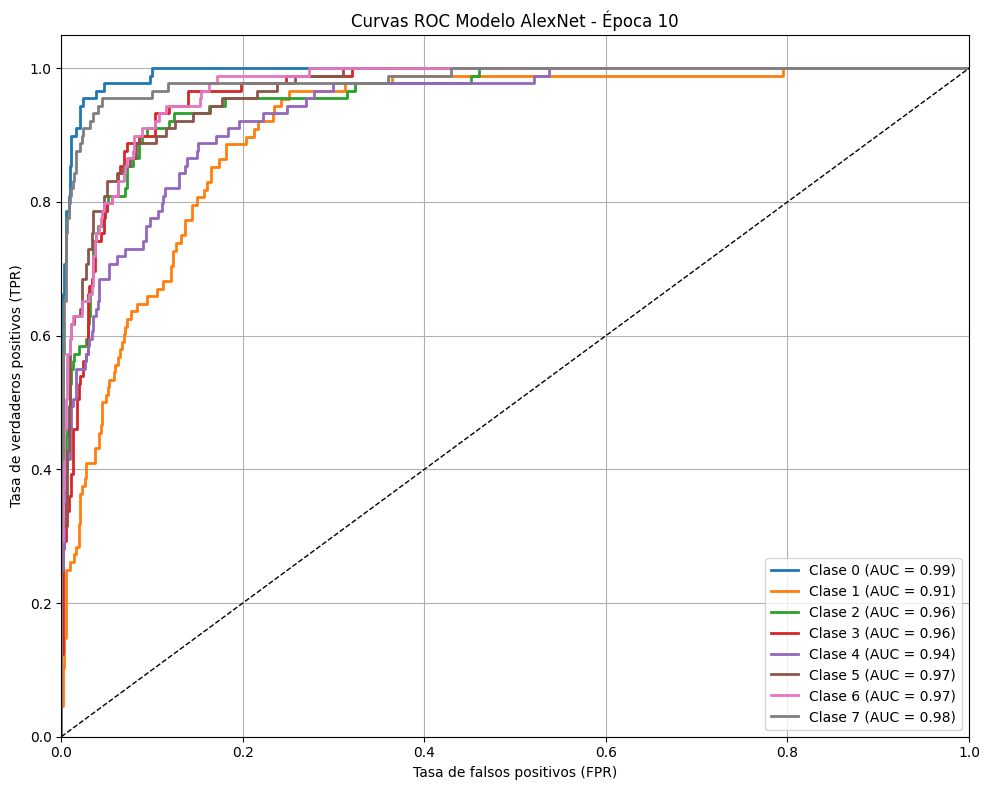

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_alexnet_1, classes=list(range(num_classes)))
y_score = np.array(prob_alexnet_1)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo AlexNet - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


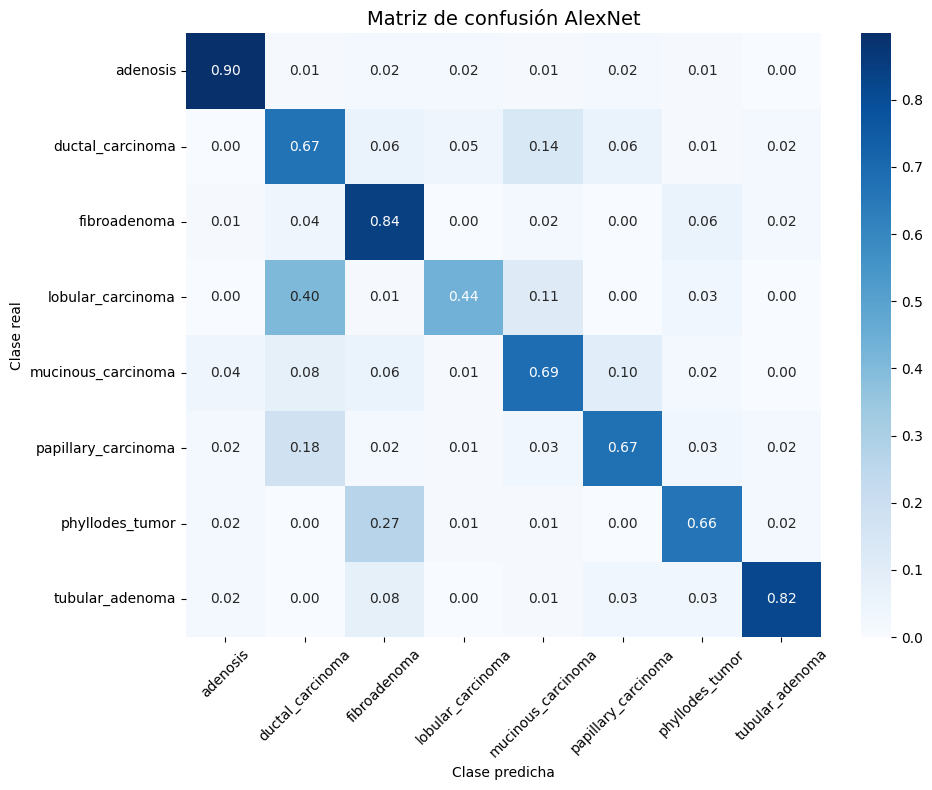

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_alexnet_1, pred_labels_alexnet_1)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión AlexNet", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



### PRUEBA 1b: Dataloader, CON DATA-AUGMENTATION, CON FINE TUNINIG, batch= 16 OK

In [ ]:
import os
from PIL import Image
import torch
from torchvision.models import alexnet, AlexNet_Weights
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# ==================================
# Modelo AlexNet preentrenado
# ==================================
model = alexnet(weights=AlexNet_Weights.DEFAULT)

# ==============================================================================
# Fine-tuning completo (descongelar capas convolucionales)
# ==============================================================================
# Las capas están descongeladas y se entrenarán.
for param in model.parameters():
    param.requires_grad = True

# Reemplazar la última capa del clasificador
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}\n")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
# Se optimizan todas las capas
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento dataloader + Evaluación
# ==============================================================================
epochs = 50

for epoch in range(epochs):
    # ============================== Entrenamiento =============================
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader_16, desc=f"Epoch {epoch+1} [Train]", leave=False):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader_16)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for images, labels in tqdm(test_loader_16, desc=f"Epoch {epoch+1} [Test]", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            # Pérdida para early stopping
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Probabilidades y predicciones
            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            # Guardar para métricas finales
            true_labels_list.extend(labels.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            # Accuracy temporal
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_loss /= len(test_loader_16)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Modelo modificado (última capa): Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=8, bias=True)
)



Epoch 1: Train Loss=1.5561, Test Loss=1.2156, Test Acc=0.5541


Epoch 2: Train Loss=1.0286, Test Loss=1.2368, Test Acc=0.5865


Epoch 3: Train Loss=0.7560, Test Loss=0.8965, Test Acc=0.6948


Epoch 4: Train Loss=0.5116, Test Loss=0.9100, Test Acc=0.6695


Epoch 5: Train Loss=0.3964, Test Loss=1.0599, Test Acc=0.6639


Epoch 6: Train Loss=0.2801, Test Loss=1.0461, Test Acc=0.6779
🛑 Early stopping en epoch 6


<All keys matched successfully>

In [ ]:
# Prueba 1
true_labels_alexnet_1b = true_labels_list
pred_labels_alexnet_1b = pred_labels_list
prob_alexnet_1b = prob_list

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_alexnet_1b = accuracy_score(true_labels_alexnet_1b, pred_labels_alexnet_1b)
error_rate_alexnet_1b = 1 - acc_alexnet_1b
print(f"Accuracy total: {acc_alexnet_1b:.4f}, Error rate: {error_rate_alexnet_1b:.4f}\n")

print(classification_report(
    true_labels_alexnet_1b,
    pred_labels_alexnet_1b,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.6779, Error rate: 0.3221

                     precision    recall  f1-score   support

           adenosis       0.80      0.83      0.81        89
   ductal_carcinoma       0.60      0.64      0.62        88
       fibroadenoma       0.66      0.73      0.70        89
  lobular_carcinoma       0.50      0.85      0.63        89
 mucinous_carcinoma       0.85      0.38      0.53        89
papillary_carcinoma       0.88      0.55      0.68        89
    phyllodes_tumor       0.75      0.58      0.66        89
    tubular_adenoma       0.70      0.85      0.77        89

           accuracy                           0.68       711
          macro avg       0.72      0.68      0.67       711
       weighted avg       0.72      0.68      0.67       711



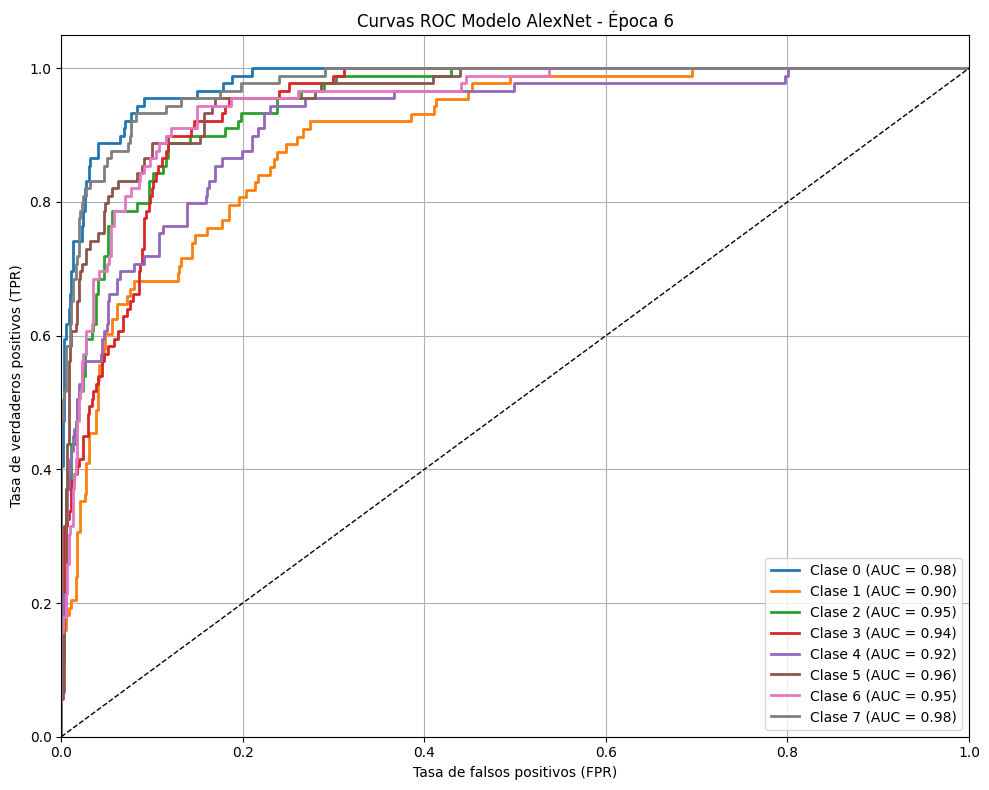

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_alexnet_1b, classes=list(range(num_classes)))
y_score = np.array(prob_alexnet_1b)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo AlexNet - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


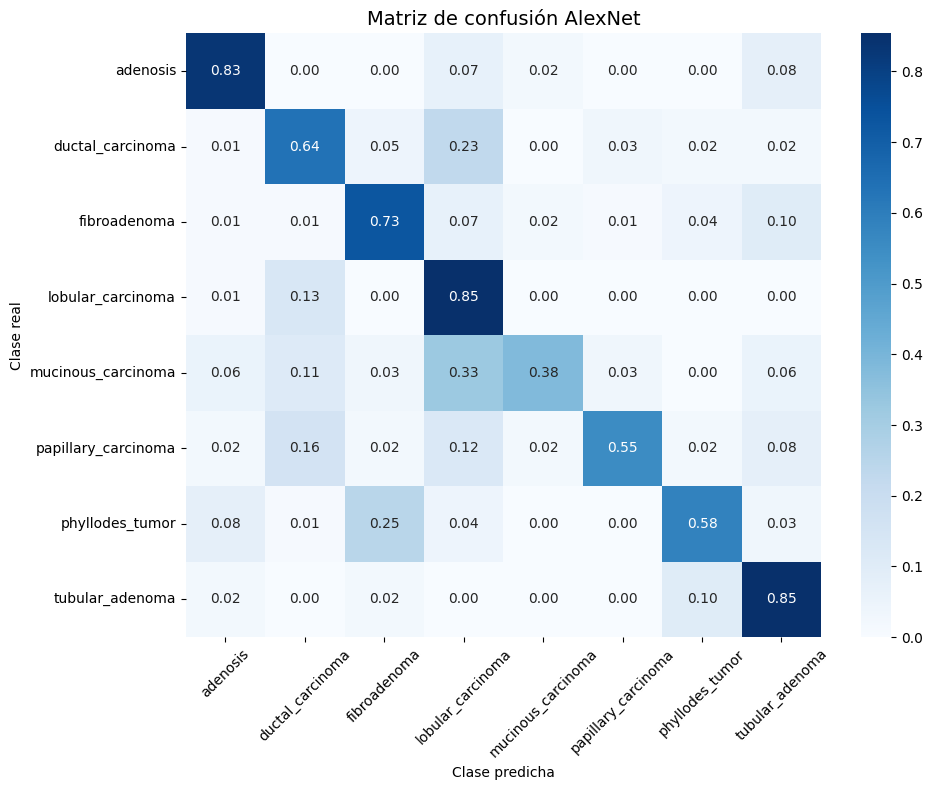

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_alexnet_1b, pred_labels_alexnet_1b)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión AlexNet", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



### PRUEBA 2a: Dataloader, CON DATA-AUGMENTATION, SIN FINE TUNINIG, batch= 32 OK

In [ ]:
import os
from PIL import Image
import torch
from torchvision.models import alexnet, AlexNet_Weights
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# ==================================
# Modelo AlexNet preentrenado
# ==================================
model = alexnet(weights=AlexNet_Weights.DEFAULT)

# ==============================================================================
# Sin fine-tuning (congelar capas convolucionales)
# ==============================================================================
# Solo las capas convolucionales
for param in model.features.parameters():
    param.requires_grad = False

# Reemplazar la última capa del clasificador
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}\n")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
# Solo se optimiza la capa final
optimizer = torch.optim.Adam(model.classifier[6].parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento dataloader + Evaluación
# ==============================================================================
epochs = 50

for epoch in range(epochs):
    # ============================= Entrenamiento ==============================
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader_32, desc=f"Epoch {epoch+1} [Train]", leave=False):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader_32)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for images, labels in tqdm(test_loader_32, desc=f"Epoch {epoch+1} [Test]", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            # Pérdida para early stopping
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Probabilidades y predicciones
            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            # Guardar para métricas finales
            true_labels_list.extend(labels.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            # Accuracy temporal
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_loss /= len(test_loader_32)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:04<00:00, 55.8MB/s]


Modelo modificado (última capa): Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=8, bias=True)
)



Epoch 1: Train Loss=1.9373, Test Loss=1.7707, Test Acc=0.3446


Epoch 2: Train Loss=1.6933, Test Loss=1.6307, Test Acc=0.3966


Epoch 3: Train Loss=1.5754, Test Loss=1.5357, Test Acc=0.4332


Epoch 4: Train Loss=1.5121, Test Loss=1.4839, Test Acc=0.4712


Epoch 5: Train Loss=1.4586, Test Loss=1.4384, Test Acc=0.4810


Epoch 6: Train Loss=1.4130, Test Loss=1.4064, Test Acc=0.4880


Epoch 7: Train Loss=1.3791, Test Loss=1.3866, Test Acc=0.4866


Epoch 8: Train Loss=1.3416, Test Loss=1.3678, Test Acc=0.5162


Epoch 9: Train Loss=1.3193, Test Loss=1.3388, Test Acc=0.5049


Epoch 10: Train Loss=1.2961, Test Loss=1.3148, Test Acc=0.5049


Epoch 11: Train Loss=1.2740, Test Loss=1.3051, Test Acc=0.5302


Epoch 12: Train Loss=1.2488, Test Loss=1.2896, Test Acc=0.5359


Epoch 13: Train Loss=1.2237, Test Loss=1.2839, Test Acc=0.5274


Epoch 14: Train Loss=1.2357, Test Loss=1.2795, Test Acc=0.5345


Epoch 15: Train Loss=1.2022, Test Loss=1.2544, Test Acc=0.5204


Epoch 16: Train Loss=1.1954, Test Loss=1.2455, Test Acc=0.5331


Epoch 17: Train Loss=1.1705, Test Loss=1.2406, Test Acc=0.5373


Epoch 18: Train Loss=1.1713, Test Loss=1.2402, Test Acc=0.5359


Epoch 19: Train Loss=1.1588, Test Loss=1.2285, Test Acc=0.5373


Epoch 20: Train Loss=1.1504, Test Loss=1.2229, Test Acc=0.5513


Epoch 21: Train Loss=1.1431, Test Loss=1.2118, Test Acc=0.5541


Epoch 22: Train Loss=1.1267, Test Loss=1.2108, Test Acc=0.5541


Epoch 23: Train Loss=1.1245, Test Loss=1.2001, Test Acc=0.5541


Epoch 24: Train Loss=1.1087, Test Loss=1.1987, Test Acc=0.5541


Epoch 25: Train Loss=1.1053, Test Loss=1.1901, Test Acc=0.5499


Epoch 26: Train Loss=1.0884, Test Loss=1.1939, Test Acc=0.5612


Epoch 27: Train Loss=1.0936, Test Loss=1.1892, Test Acc=0.5556


Epoch 28: Train Loss=1.0821, Test Loss=1.1767, Test Acc=0.5696


Epoch 29: Train Loss=1.0802, Test Loss=1.1802, Test Acc=0.5556


Epoch 30: Train Loss=1.0732, Test Loss=1.1747, Test Acc=0.5556


Epoch 31: Train Loss=1.0722, Test Loss=1.1761, Test Acc=0.5668


Epoch 32: Train Loss=1.0556, Test Loss=1.1676, Test Acc=0.5696


Epoch 33: Train Loss=1.0549, Test Loss=1.1748, Test Acc=0.5626


Epoch 34: Train Loss=1.0339, Test Loss=1.1782, Test Acc=0.5556


Epoch 35: Train Loss=1.0342, Test Loss=1.1752, Test Acc=0.5584
🛑 Early stopping en epoch 35


<All keys matched successfully>

In [ ]:
# Prueba 2
true_labels_alexnet_2a = true_labels_list
pred_labels_alexnet_2a = pred_labels_list
prob_alexnet_2a = prob_list

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_alexnet_2a = accuracy_score(true_labels_alexnet_2a, pred_labels_alexnet_2a)
error_rate_alexnet_2a = 1 - acc_alexnet_2a
print(f"Accuracy total: {acc_alexnet_2a:.4f}, Error rate: {error_rate_alexnet_2a:.4f}\n")

print(classification_report(
    true_labels_alexnet_2a,
    pred_labels_alexnet_2a,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.5584, Error rate: 0.4416

                     precision    recall  f1-score   support

           adenosis       0.68      0.73      0.71        89
   ductal_carcinoma       0.42      0.59      0.49        88
       fibroadenoma       0.52      0.37      0.43        89
  lobular_carcinoma       0.54      0.64      0.59        89
 mucinous_carcinoma       0.42      0.31      0.36        89
papillary_carcinoma       0.71      0.51      0.59        89
    phyllodes_tumor       0.55      0.75      0.64        89
    tubular_adenoma       0.70      0.56      0.62        89

           accuracy                           0.56       711
          macro avg       0.57      0.56      0.55       711
       weighted avg       0.57      0.56      0.55       711



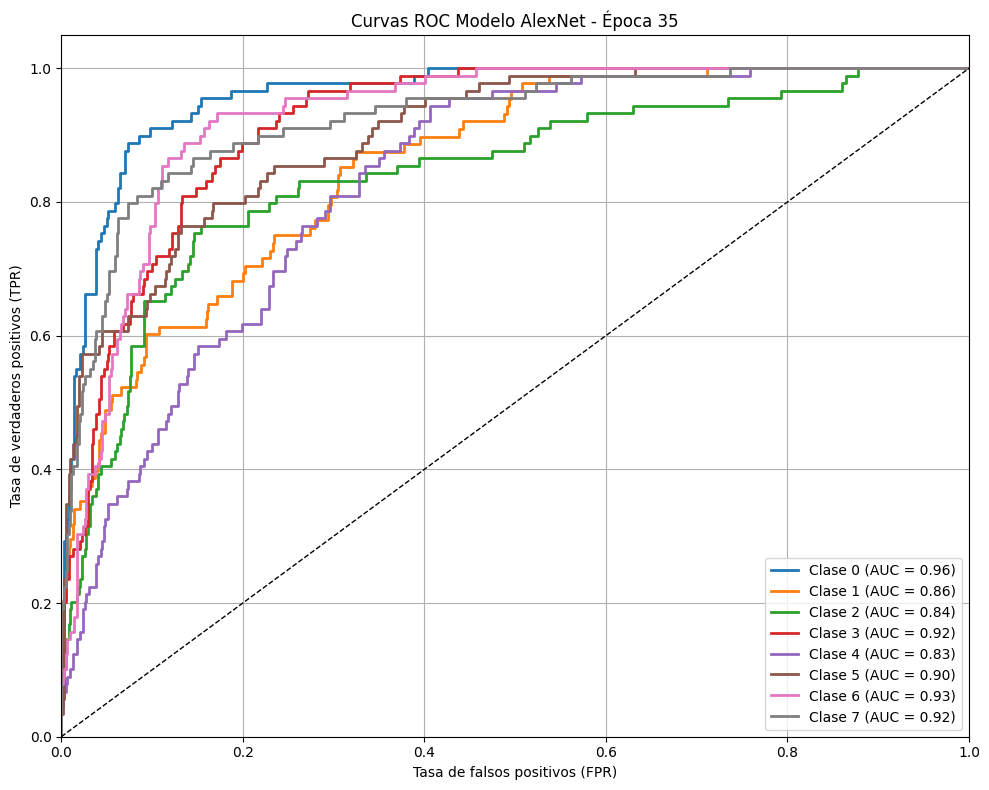

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_alexnet_2a, classes=list(range(num_classes)))
y_score = np.array(prob_alexnet_2a)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo AlexNet - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


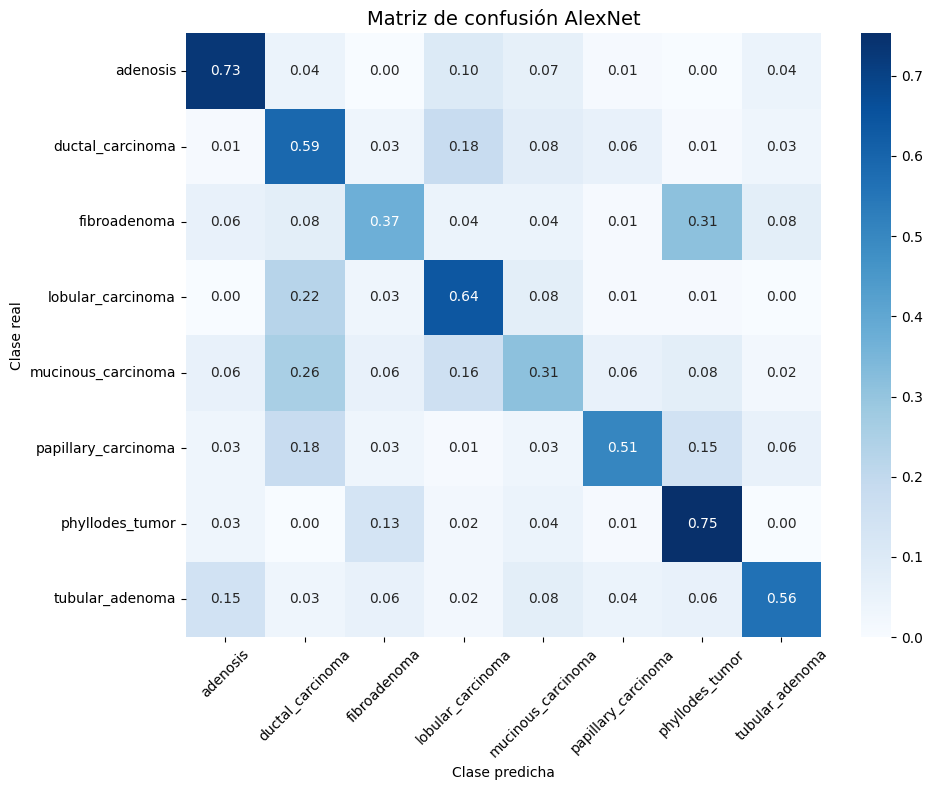

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_alexnet_2a, pred_labels_alexnet_2a)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión AlexNet", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### PRUEBA 2b: Dataloader,CON DATA-AUGMENTATION, SIN FINE TUNINIG, batch= 16 OK

In [ ]:
import os
from PIL import Image
import torch
from torchvision.models import alexnet, AlexNet_Weights
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# ==================================
# Modelo AlexNet preentrenado
# ==================================
model = alexnet(weights=AlexNet_Weights.DEFAULT)

# ==============================================================================
# Sin fine-tuning (congelar capas convolucionales)
# ==============================================================================
# Solo las capas convolucionales
for param in model.features.parameters():
    param.requires_grad = False

# Reemplazar la última capa del clasificador
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}\n")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.classifier[6].parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento dataloader + Evaluación
# ==============================================================================
epochs = 50

for epoch in range(epochs):
    # ============================== Entrenamiento =============================
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader_16, desc=f"Epoch {epoch+1} [Train]", leave=False):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader_16)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for images, labels in tqdm(test_loader_16, desc=f"Epoch {epoch+1} [Test]", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            # Pérdida para early stopping
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Probabilidades y predicciones
            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            # Guardar para métricas finales
            true_labels_list.extend(labels.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            # Accuracy temporal
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_loss /= len(test_loader_16)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Modelo modificado (última capa): Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=8, bias=True)
)



Epoch 1: Train Loss=1.8718, Test Loss=1.6783, Test Acc=0.3910


Epoch 2: Train Loss=1.6074, Test Loss=1.5540, Test Acc=0.4177


Epoch 3: Train Loss=1.5122, Test Loss=1.4749, Test Acc=0.4599


Epoch 4: Train Loss=1.4337, Test Loss=1.4248, Test Acc=0.4768


Epoch 5: Train Loss=1.3827, Test Loss=1.3856, Test Acc=0.4796


Epoch 6: Train Loss=1.3358, Test Loss=1.3729, Test Acc=0.4838


Epoch 7: Train Loss=1.3119, Test Loss=1.3366, Test Acc=0.4965


Epoch 8: Train Loss=1.2806, Test Loss=1.3113, Test Acc=0.5120


Epoch 9: Train Loss=1.2488, Test Loss=1.3015, Test Acc=0.5091


Epoch 10: Train Loss=1.2365, Test Loss=1.2817, Test Acc=0.5302


Epoch 11: Train Loss=1.2090, Test Loss=1.2707, Test Acc=0.5246


Epoch 12: Train Loss=1.2071, Test Loss=1.2597, Test Acc=0.5415


Epoch 13: Train Loss=1.1808, Test Loss=1.2596, Test Acc=0.5331


Epoch 14: Train Loss=1.1691, Test Loss=1.2361, Test Acc=0.5527


Epoch 15: Train Loss=1.1501, Test Loss=1.2250, Test Acc=0.5457


Epoch 16: Train Loss=1.1326, Test Loss=1.2196, Test Acc=0.5485


Epoch 17: Train Loss=1.1155, Test Loss=1.2277, Test Acc=0.5429


Epoch 18: Train Loss=1.1073, Test Loss=1.1944, Test Acc=0.5598


Epoch 19: Train Loss=1.1043, Test Loss=1.2002, Test Acc=0.5499


Epoch 20: Train Loss=1.0801, Test Loss=1.2041, Test Acc=0.5457


Epoch 21: Train Loss=1.0758, Test Loss=1.1897, Test Acc=0.5668


Epoch 22: Train Loss=1.0854, Test Loss=1.1964, Test Acc=0.5457


Epoch 23: Train Loss=1.0528, Test Loss=1.1850, Test Acc=0.5556


Epoch 24: Train Loss=1.0552, Test Loss=1.1790, Test Acc=0.5598


Epoch 25: Train Loss=1.0397, Test Loss=1.1817, Test Acc=0.5513


Epoch 26: Train Loss=1.0409, Test Loss=1.1725, Test Acc=0.5527


Epoch 27: Train Loss=1.0133, Test Loss=1.1887, Test Acc=0.5471


Epoch 28: Train Loss=1.0177, Test Loss=1.1702, Test Acc=0.5640


Epoch 29: Train Loss=0.9956, Test Loss=1.1550, Test Acc=0.5823


Epoch 30: Train Loss=1.0096, Test Loss=1.1727, Test Acc=0.5626


Epoch 31: Train Loss=1.0043, Test Loss=1.1577, Test Acc=0.5767


Epoch 32: Train Loss=0.9972, Test Loss=1.1643, Test Acc=0.5626
🛑 Early stopping en epoch 32


<All keys matched successfully>

In [ ]:
# Prueba 2
true_labels_alexnet_2b = true_labels_list
pred_labels_alexnet_2b = pred_labels_list
prob_alexnet_2b = prob_list

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_alexnet_2b = accuracy_score(true_labels_alexnet_2b, pred_labels_alexnet_2b)
error_rate_alexnet_2b = 1 - acc_alexnet_2b
print(f"Accuracy total: {acc_alexnet_2b:.4f}, Error rate: {error_rate_alexnet_2b:.4f}\n")

print(classification_report(
    true_labels_alexnet_2b,
    pred_labels_alexnet_2b,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.5626, Error rate: 0.4374

                     precision    recall  f1-score   support

           adenosis       0.74      0.75      0.74        89
   ductal_carcinoma       0.36      0.61      0.46        88
       fibroadenoma       0.55      0.40      0.47        89
  lobular_carcinoma       0.56      0.56      0.56        89
 mucinous_carcinoma       0.44      0.33      0.37        89
papillary_carcinoma       0.75      0.48      0.59        89
    phyllodes_tumor       0.55      0.74      0.63        89
    tubular_adenoma       0.74      0.62      0.67        89

           accuracy                           0.56       711
          macro avg       0.59      0.56      0.56       711
       weighted avg       0.59      0.56      0.56       711



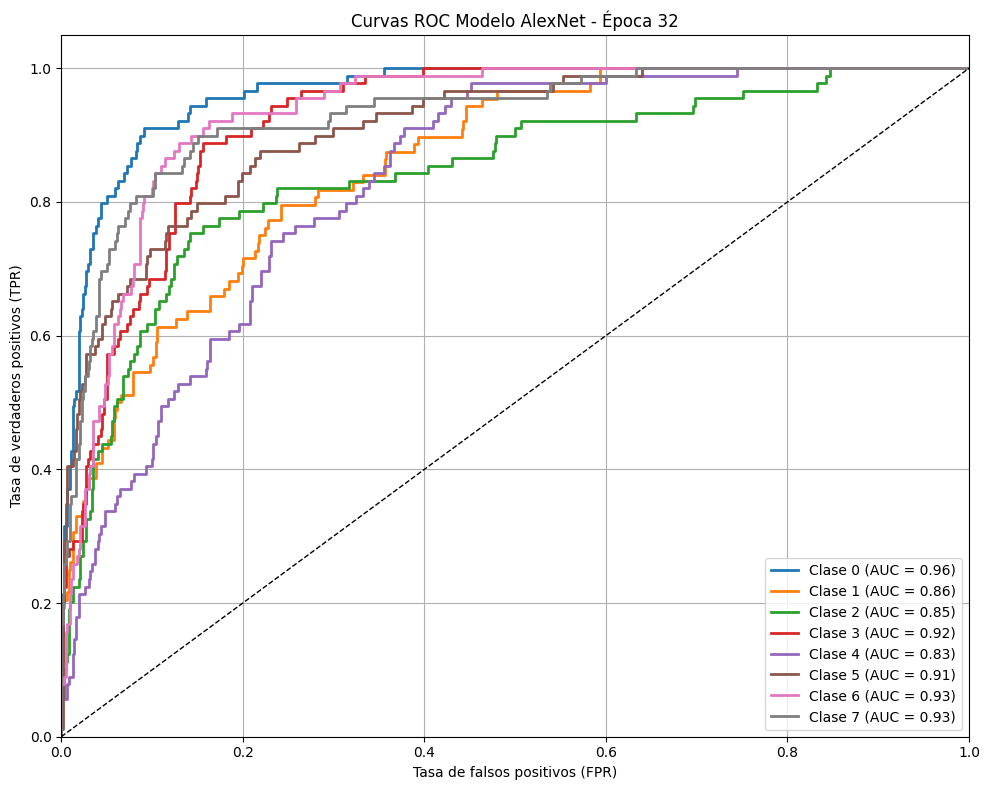

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_alexnet_2b, classes=list(range(num_classes)))
y_score = np.array(prob_alexnet_2b)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo AlexNet - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


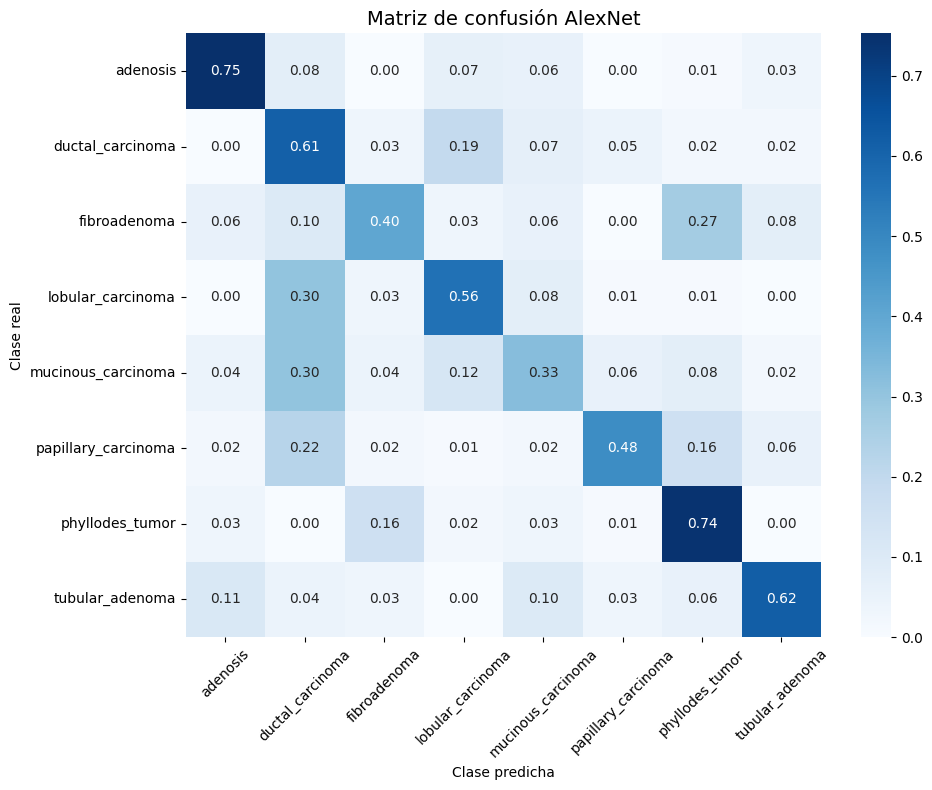

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_alexnet_2b, pred_labels_alexnet_2b)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión AlexNet", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### PRUEBA 3a: batch-loading, CON DATA-AUGMENTATION, CON FINE TUNINIG, batch= 32 OK

In [ ]:
import os
from PIL import Image
import torch
from torchvision.models import alexnet, AlexNet_Weights
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from random import shuffle

# ==================================
# Modelo AlexNet preentrenado
# ==================================
model = alexnet(weights=AlexNet_Weights.DEFAULT)

# ==============================================================================
# Fine-tuning completo (descongelar capas convolucionales)
# ==============================================================================
# Las capas están descongeladas y se entrenarán.
for param in model.parameters():
    param.requires_grad = True


# Reemplazar la última capa del clasificador
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}\n")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento batch-loading + Evaluación
# ==============================================================================
batch_size = 32
epochs = 50

for epoch in range(epochs):
    # ============================= Entrenamiento ==============================
    model.train()
    running_loss = 0.0
    train_indices = list(range(len(train_image_paths)))
    shuffle(train_indices)

    for start_idx in tqdm(range(0, len(train_image_paths), batch_size), desc=f"Epoch {epoch+1} [Train]", leave=False):
        batch_indices = train_indices[start_idx:start_idx+batch_size]

        images, labels_batch = [], []
        for i in batch_indices:
            img = Image.open(train_image_paths[i]).convert("RGB")
            img = train_transform(img)
            images.append(img)
            labels_batch.append(train_labels[i])

        images_tensor = torch.stack(images).to(device)
        labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

        optimizer.zero_grad()
        outputs = model(images_tensor)
        loss = criterion(outputs, labels_tensor)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / (len(train_image_paths) / batch_size)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for start_idx in tqdm(range(0, len(test_image_paths), batch_size), desc=f"Epoch {epoch+1} [Test]", leave=False):
            batch_indices = list(range(start_idx, min(start_idx+batch_size, len(test_image_paths))))

            images, labels_batch = [], []
            for i in batch_indices:
                img = Image.open(test_image_paths[i]).convert("RGB")
                img = test_transform(img)
                images.append(img)
                labels_batch.append(test_labels[i])

            images_tensor = torch.stack(images).to(device)
            labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

            outputs = model(images_tensor)
            loss = criterion(outputs, labels_tensor)
            val_loss += loss.item()

            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            true_labels_list.extend(labels_tensor.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            correct += (preds == labels_tensor).sum().item()
            total += labels_tensor.size(0)

    val_loss /= (len(test_image_paths) / batch_size)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Modelo modificado (última capa): Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=8, bias=True)
)



Epoch 1: Train Loss=1.5955, Test Loss=1.1620, Test Acc=0.5977


Epoch 2: Train Loss=1.1264, Test Loss=0.9317, Test Acc=0.6653


Epoch 3: Train Loss=0.8860, Test Loss=0.7513, Test Acc=0.7454


Epoch 4: Train Loss=0.7258, Test Loss=0.7255, Test Acc=0.7581


Epoch 5: Train Loss=0.6749, Test Loss=0.6622, Test Acc=0.7722


Epoch 6: Train Loss=0.5604, Test Loss=0.6249, Test Acc=0.8017


Epoch 7: Train Loss=0.5337, Test Loss=0.9361, Test Acc=0.6653


Epoch 8: Train Loss=0.4122, Test Loss=0.6219, Test Acc=0.7890


Epoch 9: Train Loss=0.4486, Test Loss=0.5792, Test Acc=0.8017


Epoch 10: Train Loss=0.3813, Test Loss=0.6168, Test Acc=0.7862


Epoch 11: Train Loss=0.3456, Test Loss=0.5622, Test Acc=0.8129


Epoch 12: Train Loss=0.2856, Test Loss=0.5062, Test Acc=0.8158


Epoch 13: Train Loss=0.2800, Test Loss=0.5664, Test Acc=0.8200


Epoch 14: Train Loss=0.2506, Test Loss=0.6037, Test Acc=0.8143


Epoch 15: Train Loss=0.2800, Test Loss=0.6400, Test Acc=0.8228
🛑 Early stopping en epoch 15


<All keys matched successfully>

In [ ]:
# Prueba 3
true_labels_alexnet_3a = true_labels_list
pred_labels_alexnet_3a = pred_labels_list
prob_alexnet_3a = prob_list

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_alexnet_3a = accuracy_score(true_labels_alexnet_3a, pred_labels_alexnet_3a)
error_rate_alexnet_3a = 1 - acc_alexnet_3a
print(f"Accuracy total: {acc_alexnet_3a:.4f}, Error rate: {error_rate_alexnet_3a:.4f}\n")

print(classification_report(
    true_labels_alexnet_3a,
    pred_labels_alexnet_3a,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.8228, Error rate: 0.1772

                     precision    recall  f1-score   support

           adenosis       0.82      0.96      0.88        89
   ductal_carcinoma       0.74      0.72      0.73        88
       fibroadenoma       0.84      0.78      0.81        89
  lobular_carcinoma       0.78      0.84      0.81        89
 mucinous_carcinoma       0.86      0.76      0.81        89
papillary_carcinoma       0.92      0.79      0.85        89
    phyllodes_tumor       0.82      0.81      0.81        89
    tubular_adenoma       0.82      0.93      0.87        89

           accuracy                           0.82       711
          macro avg       0.83      0.82      0.82       711
       weighted avg       0.83      0.82      0.82       711



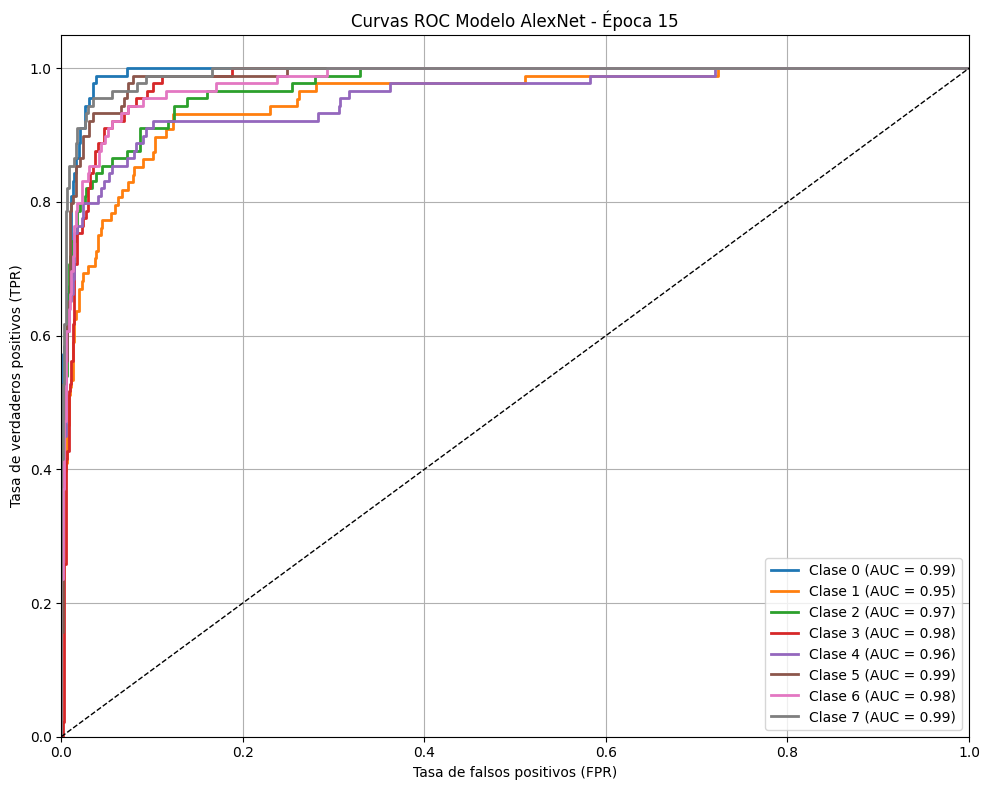

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_alexnet_3a, classes=list(range(num_classes)))
y_score = np.array(prob_alexnet_3a)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo AlexNet - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


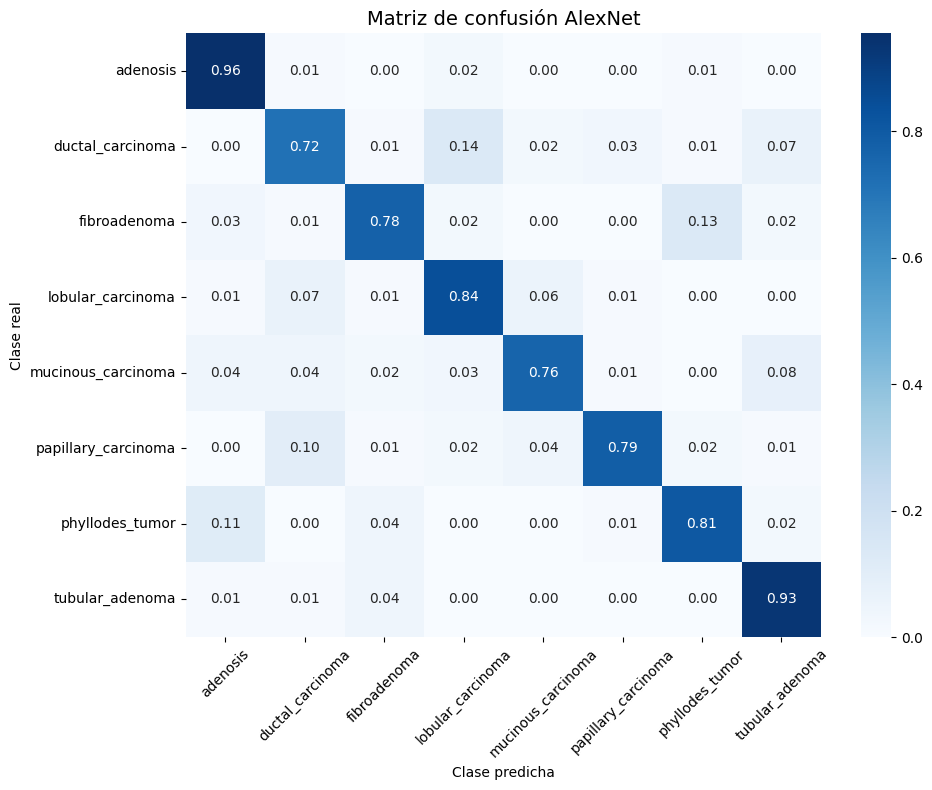

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_alexnet_3a, pred_labels_alexnet_3a)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión AlexNet", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



### PRUEBA 3b: batch-loading, CON DATA-AUGMENTATION, SIN FINE TUNINIG, batch= 32 OK

In [ ]:
import os
from PIL import Image
import torch
from torchvision.models import alexnet, AlexNet_Weights
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from random import shuffle

# ==================================
# Modelo AlexNet preentrenado
# ==================================
model = alexnet(weights=AlexNet_Weights.DEFAULT)

# ==============================================================================
# Sin fine-tuning (congelar capas convolucionales)
# ==============================================================================
# Solo las capas convolucionales
for param in model.features.parameters():
    param.requires_grad = False

# Reemplazar la última capa del clasificador
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}\n")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.classifier[6].parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento batch-loading + Evaluación
# ==============================================================================
batch_size = 32
epochs = 50

for epoch in range(epochs):
    # ============================= Entrenamiento ==============================
    model.train()
    running_loss = 0.0
    train_indices = list(range(len(train_image_paths)))
    shuffle(train_indices)

    for start_idx in tqdm(range(0, len(train_image_paths), batch_size), desc=f"Epoch {epoch+1} [Train]", leave=False):
        batch_indices = train_indices[start_idx:start_idx+batch_size]

        images, labels_batch = [], []
        for i in batch_indices:
            img = Image.open(train_image_paths[i]).convert("RGB")
            img = train_transform(img)
            images.append(img)
            labels_batch.append(train_labels[i])

        images_tensor = torch.stack(images).to(device)
        labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

        optimizer.zero_grad()
        outputs = model(images_tensor)
        loss = criterion(outputs, labels_tensor)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / (len(train_image_paths) / batch_size)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for start_idx in tqdm(range(0, len(test_image_paths), batch_size), desc=f"Epoch {epoch+1} [Test]", leave=False):
            batch_indices = list(range(start_idx, min(start_idx+batch_size, len(test_image_paths))))

            images, labels_batch = [], []
            for i in batch_indices:
                img = Image.open(test_image_paths[i]).convert("RGB")
                img = test_transform(img)
                images.append(img)
                labels_batch.append(test_labels[i])

            images_tensor = torch.stack(images).to(device)
            labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

            outputs = model(images_tensor)
            loss = criterion(outputs, labels_tensor)
            val_loss += loss.item()

            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            true_labels_list.extend(labels_tensor.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            correct += (preds == labels_tensor).sum().item()
            total += labels_tensor.size(0)

    val_loss /= (len(test_image_paths) / batch_size)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Modelo modificado (última capa): Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=8, bias=True)
)



Epoch 1: Train Loss=1.9422, Test Loss=1.8802, Test Acc=0.3277


Epoch 2: Train Loss=1.7161, Test Loss=1.7130, Test Acc=0.3980


Epoch 3: Train Loss=1.6066, Test Loss=1.6186, Test Acc=0.4262


Epoch 4: Train Loss=1.5370, Test Loss=1.5396, Test Acc=0.4655


Epoch 5: Train Loss=1.5007, Test Loss=1.4968, Test Acc=0.4796


Epoch 6: Train Loss=1.4593, Test Loss=1.4659, Test Acc=0.4782


Epoch 7: Train Loss=1.4318, Test Loss=1.4212, Test Acc=0.4937


Epoch 8: Train Loss=1.4096, Test Loss=1.3954, Test Acc=0.5035


Epoch 9: Train Loss=1.3914, Test Loss=1.3708, Test Acc=0.5218


Epoch 10: Train Loss=1.3811, Test Loss=1.3568, Test Acc=0.5091


Epoch 11: Train Loss=1.3671, Test Loss=1.3355, Test Acc=0.5316


Epoch 12: Train Loss=1.3217, Test Loss=1.3291, Test Acc=0.5316


Epoch 13: Train Loss=1.3153, Test Loss=1.3125, Test Acc=0.5316


Epoch 14: Train Loss=1.2986, Test Loss=1.3033, Test Acc=0.5302


Epoch 15: Train Loss=1.2932, Test Loss=1.2776, Test Acc=0.5527


Epoch 16: Train Loss=1.2987, Test Loss=1.2698, Test Acc=0.5373


Epoch 17: Train Loss=1.2883, Test Loss=1.2593, Test Acc=0.5471


Epoch 18: Train Loss=1.2631, Test Loss=1.2548, Test Acc=0.5598


Epoch 19: Train Loss=1.2557, Test Loss=1.2336, Test Acc=0.5541


Epoch 20: Train Loss=1.2479, Test Loss=1.2409, Test Acc=0.5541


Epoch 21: Train Loss=1.2395, Test Loss=1.2229, Test Acc=0.5640


Epoch 22: Train Loss=1.2430, Test Loss=1.2188, Test Acc=0.5584


Epoch 23: Train Loss=1.2273, Test Loss=1.2174, Test Acc=0.5556


Epoch 24: Train Loss=1.2177, Test Loss=1.2120, Test Acc=0.5612


Epoch 25: Train Loss=1.1949, Test Loss=1.1951, Test Acc=0.5682


Epoch 26: Train Loss=1.1995, Test Loss=1.1998, Test Acc=0.5781


Epoch 27: Train Loss=1.1952, Test Loss=1.1949, Test Acc=0.5851


Epoch 28: Train Loss=1.1834, Test Loss=1.1832, Test Acc=0.5752


Epoch 29: Train Loss=1.1952, Test Loss=1.1799, Test Acc=0.5781


Epoch 30: Train Loss=1.1866, Test Loss=1.1771, Test Acc=0.5879


Epoch 31: Train Loss=1.2051, Test Loss=1.1841, Test Acc=0.5837


Epoch 32: Train Loss=1.1897, Test Loss=1.1749, Test Acc=0.5781


Epoch 33: Train Loss=1.1564, Test Loss=1.1612, Test Acc=0.5963


Epoch 34: Train Loss=1.1515, Test Loss=1.1590, Test Acc=0.5977


Epoch 35: Train Loss=1.1595, Test Loss=1.1431, Test Acc=0.5977


Epoch 36: Train Loss=1.1754, Test Loss=1.1441, Test Acc=0.5963


Epoch 37: Train Loss=1.1549, Test Loss=1.1335, Test Acc=0.5992


Epoch 38: Train Loss=1.1633, Test Loss=1.1300, Test Acc=0.5992


Epoch 39: Train Loss=1.1415, Test Loss=1.1377, Test Acc=0.5992


Epoch 40: Train Loss=1.1438, Test Loss=1.1297, Test Acc=0.6104


Epoch 41: Train Loss=1.1452, Test Loss=1.1303, Test Acc=0.6118
🛑 Early stopping en epoch 41


<All keys matched successfully>

In [ ]:
# Prueba 3
true_labels_alexnet_3b = true_labels_list
pred_labels_alexnet_3b = pred_labels_list
prob_alexnet_3b = prob_list

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_alexnet_3b = accuracy_score(true_labels_alexnet_3b, pred_labels_alexnet_3b)
error_rate_alexnet_3b = 1 - acc_alexnet_3b
print(f"Accuracy total: {acc_alexnet_3b:.4f}, Error rate: {error_rate_alexnet_3b:.4f}\n")

print(classification_report(
    true_labels_alexnet_3b,
    pred_labels_alexnet_3b,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.6118, Error rate: 0.3882

                     precision    recall  f1-score   support

           adenosis       0.71      0.76      0.74        89
   ductal_carcinoma       0.58      0.52      0.55        88
       fibroadenoma       0.55      0.53      0.54        89
  lobular_carcinoma       0.64      0.80      0.71        89
 mucinous_carcinoma       0.70      0.37      0.49        89
papillary_carcinoma       0.62      0.60      0.61        89
    phyllodes_tumor       0.48      0.69      0.56        89
    tubular_adenoma       0.70      0.63      0.66        89

           accuracy                           0.61       711
          macro avg       0.62      0.61      0.61       711
       weighted avg       0.62      0.61      0.61       711



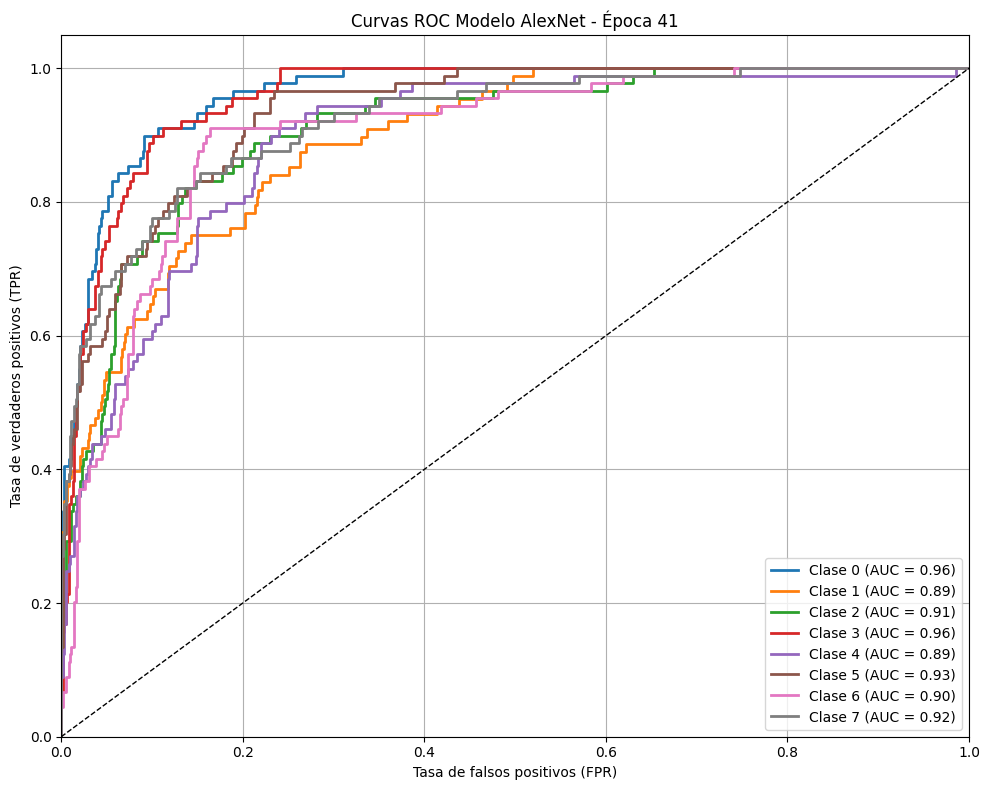

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_alexnet_3b, classes=list(range(num_classes)))
y_score = np.array(prob_alexnet_3b)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo AlexNet - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


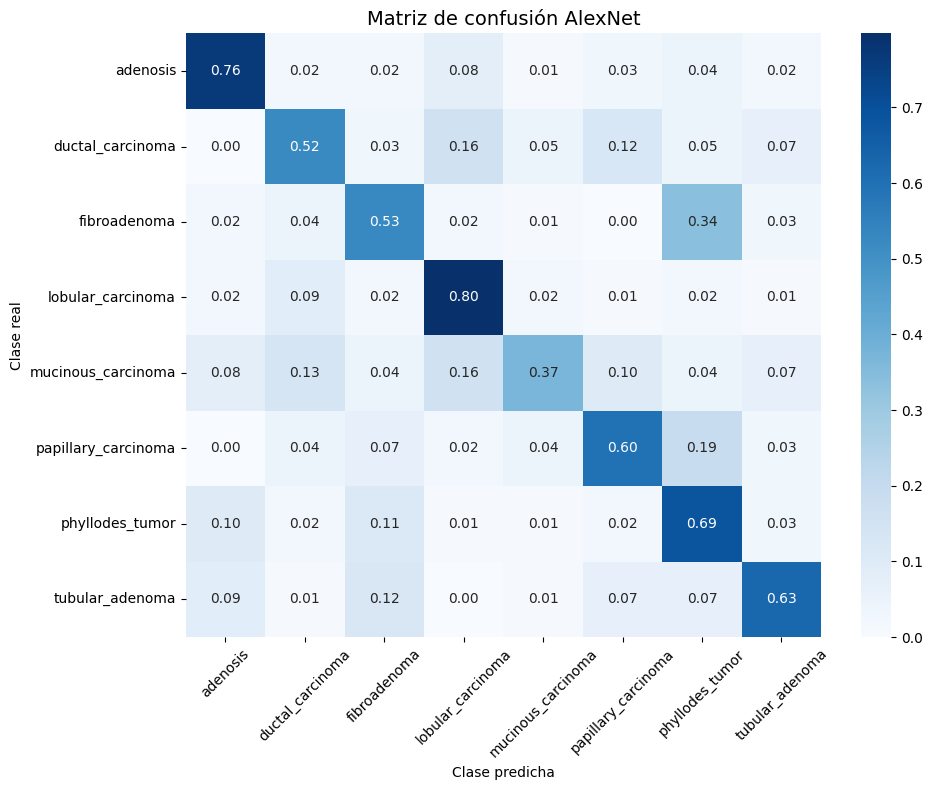

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_alexnet_3b, pred_labels_alexnet_3b)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión AlexNet", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



### PRUEBA 4a: batch-loading, CON DATA-AUGMENTATION, SIN FINE TUNINIG, batch= 16 OK

In [ ]:
import os
from PIL import Image
import torch
from torchvision.models import alexnet, AlexNet_Weights
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from random import shuffle

# ==================================
# Modelo AlexNet preentrenado
# ==================================
model = alexnet(weights=AlexNet_Weights.DEFAULT)

# ==============================================================================
# Sin fine-tuning (congelar capas convolucionales)
# ==============================================================================
# Solo las capas convolucionales
for param in model.features.parameters():
    param.requires_grad = False

# Reemplazar la última capa del clasificador
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}\n")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.classifier[6].parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento batch-loading + Evaluación
# ==============================================================================
batch_size = 16
epochs = 50

for epoch in range(epochs):
    # ============================= Entrenamiento ==============================
    model.train()
    running_loss = 0.0
    train_indices = list(range(len(train_image_paths)))
    shuffle(train_indices)

    for start_idx in tqdm(range(0, len(train_image_paths), batch_size), desc=f"Epoch {epoch+1} [Train]", leave=False):
        batch_indices = train_indices[start_idx:start_idx+batch_size]

        images, labels_batch = [], []
        for i in batch_indices:
            img = Image.open(train_image_paths[i]).convert("RGB")
            img = train_transform(img)
            images.append(img)
            labels_batch.append(train_labels[i])

        images_tensor = torch.stack(images).to(device)
        labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

        optimizer.zero_grad()
        outputs = model(images_tensor)
        loss = criterion(outputs, labels_tensor)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / (len(train_image_paths) / batch_size)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for start_idx in tqdm(range(0, len(test_image_paths), batch_size), desc=f"Epoch {epoch+1} [Test]", leave=False):
            batch_indices = list(range(start_idx, min(start_idx+batch_size, len(test_image_paths))))

            images, labels_batch = [], []
            for i in batch_indices:
                img = Image.open(test_image_paths[i]).convert("RGB")
                img = test_transform(img)
                images.append(img)
                labels_batch.append(test_labels[i])

            images_tensor = torch.stack(images).to(device)
            labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

            outputs = model(images_tensor)
            loss = criterion(outputs, labels_tensor)
            val_loss += loss.item()

            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            true_labels_list.extend(labels_tensor.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            correct += (preds == labels_tensor).sum().item()
            total += labels_tensor.size(0)

    val_loss /= (len(test_image_paths) / batch_size)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Modelo modificado (última capa): Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=8, bias=True)
)



Epoch 1: Train Loss=1.9038, Test Loss=1.7253, Test Acc=0.4008


Epoch 2: Train Loss=1.6479, Test Loss=1.5480, Test Acc=0.4754


Epoch 3: Train Loss=1.5398, Test Loss=1.4632, Test Acc=0.4866


Epoch 4: Train Loss=1.4792, Test Loss=1.4100, Test Acc=0.5105


Epoch 5: Train Loss=1.4438, Test Loss=1.3816, Test Acc=0.5063


Epoch 6: Train Loss=1.3970, Test Loss=1.3398, Test Acc=0.5176


Epoch 7: Train Loss=1.3622, Test Loss=1.3109, Test Acc=0.5260


Epoch 8: Train Loss=1.3517, Test Loss=1.2764, Test Acc=0.5331


Epoch 9: Train Loss=1.3112, Test Loss=1.2641, Test Acc=0.5415


Epoch 10: Train Loss=1.3097, Test Loss=1.2446, Test Acc=0.5359


Epoch 11: Train Loss=1.3052, Test Loss=1.2110, Test Acc=0.5584


Epoch 12: Train Loss=1.2839, Test Loss=1.2109, Test Acc=0.5612


Epoch 13: Train Loss=1.2728, Test Loss=1.1912, Test Acc=0.5612


Epoch 14: Train Loss=1.2457, Test Loss=1.1797, Test Acc=0.5612


Epoch 15: Train Loss=1.2307, Test Loss=1.1765, Test Acc=0.5682


Epoch 16: Train Loss=1.2257, Test Loss=1.1777, Test Acc=0.5865


Epoch 17: Train Loss=1.2340, Test Loss=1.1634, Test Acc=0.5921


Epoch 18: Train Loss=1.2207, Test Loss=1.1483, Test Acc=0.5921


Epoch 19: Train Loss=1.2197, Test Loss=1.1374, Test Acc=0.5921


Epoch 20: Train Loss=1.1891, Test Loss=1.1437, Test Acc=0.5977


Epoch 21: Train Loss=1.1926, Test Loss=1.1317, Test Acc=0.5992


Epoch 22: Train Loss=1.1841, Test Loss=1.1136, Test Acc=0.6048


Epoch 23: Train Loss=1.1713, Test Loss=1.1135, Test Acc=0.5935


Epoch 24: Train Loss=1.1676, Test Loss=1.1123, Test Acc=0.6048


Epoch 25: Train Loss=1.1771, Test Loss=1.1011, Test Acc=0.6062


Epoch 26: Train Loss=1.1775, Test Loss=1.1100, Test Acc=0.6174


Epoch 27: Train Loss=1.1490, Test Loss=1.0976, Test Acc=0.6048


Epoch 28: Train Loss=1.1472, Test Loss=1.0935, Test Acc=0.6231


Epoch 29: Train Loss=1.1343, Test Loss=1.0944, Test Acc=0.6160


Epoch 30: Train Loss=1.1357, Test Loss=1.0796, Test Acc=0.6217


Epoch 31: Train Loss=1.1285, Test Loss=1.0883, Test Acc=0.6174


Epoch 32: Train Loss=1.1553, Test Loss=1.0713, Test Acc=0.6273


Epoch 33: Train Loss=1.1153, Test Loss=1.0775, Test Acc=0.6259


Epoch 34: Train Loss=1.1194, Test Loss=1.0741, Test Acc=0.6118


Epoch 35: Train Loss=1.1270, Test Loss=1.0735, Test Acc=0.6132
🛑 Early stopping en epoch 35


<All keys matched successfully>

In [ ]:
# Prueba 4
true_labels_alexnet_4a = true_labels_list
pred_labels_alexnet_4a = pred_labels_list
prob_alexnet_4a = prob_list

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_alexnet_4a = accuracy_score(true_labels_alexnet_4a, pred_labels_alexnet_4a)
error_rate_alexnet_4a = 1 - acc_alexnet_4a
print(f"Accuracy total: {acc_alexnet_4a:.4f}, Error rate: {error_rate_alexnet_4a:.4f}\n")

print(classification_report(
    true_labels_alexnet_4a,
    pred_labels_alexnet_4a,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.6132, Error rate: 0.3868

                     precision    recall  f1-score   support

           adenosis       0.72      0.76      0.74        89
   ductal_carcinoma       0.70      0.44      0.54        88
       fibroadenoma       0.50      0.70      0.58        89
  lobular_carcinoma       0.59      0.87      0.70        89
 mucinous_carcinoma       0.61      0.40      0.49        89
papillary_carcinoma       0.62      0.56      0.59        89
    phyllodes_tumor       0.57      0.51      0.54        89
    tubular_adenoma       0.67      0.66      0.67        89

           accuracy                           0.61       711
          macro avg       0.62      0.61      0.61       711
       weighted avg       0.62      0.61      0.61       711



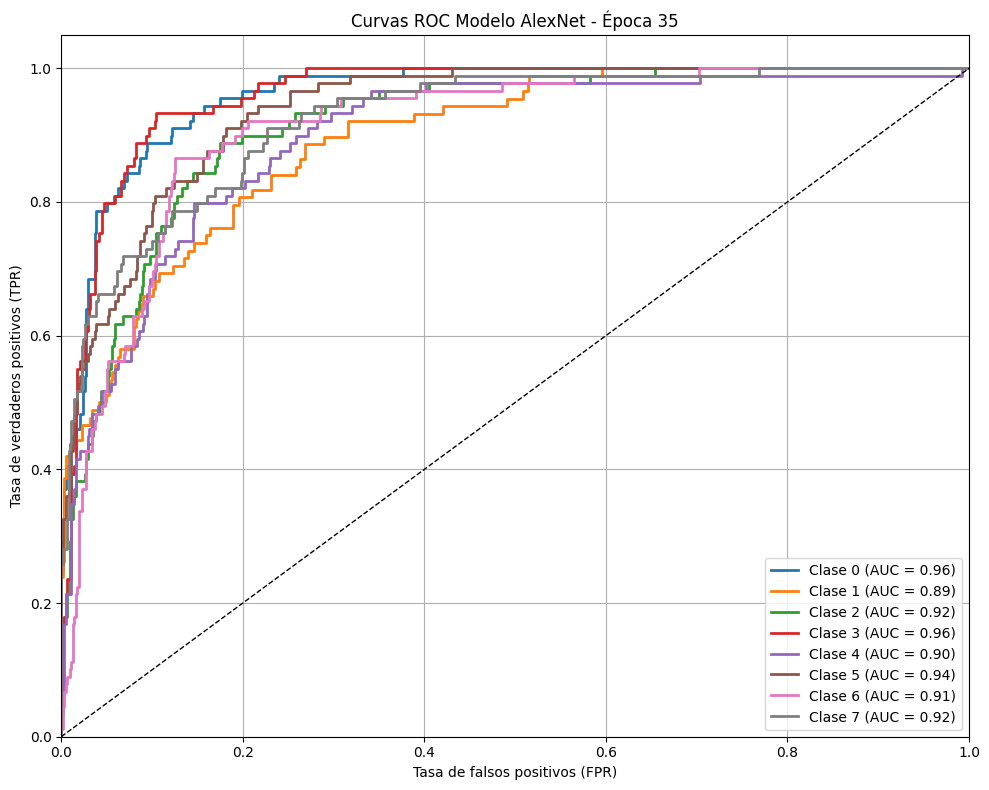

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_alexnet_4a, classes=list(range(num_classes)))
y_score = np.array(prob_alexnet_4a)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo AlexNet - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


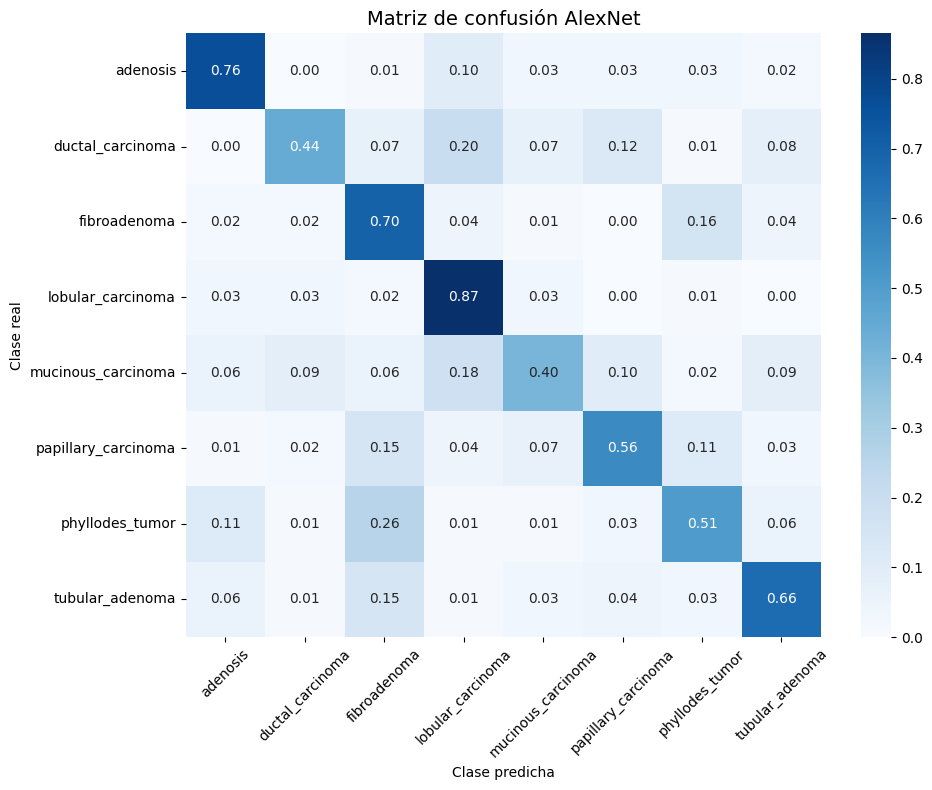

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_alexnet_4a, pred_labels_alexnet_4a)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión AlexNet", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



### PRUEBA 4b: batch-loading, CON DATA-AUGMENTATION, CON FINE TUNINIG, batch= 16 OK

In [ ]:
import os
from PIL import Image
import torch
from torchvision.models import alexnet, AlexNet_Weights
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from random import shuffle

# ==================================
# Modelo AlexNet preentrenado
# ==================================
model = alexnet(weights=AlexNet_Weights.DEFAULT)

# ==============================================================================
# Fine-tuning completo (descongelar capas convolucionales)
# ==============================================================================
# Las capas están descongeladas y se entrenarán.
for param in model.parameters():
    param.requires_grad = True


# Reemplazar la última capa del clasificador
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}\n")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
# optimizer = optim.Adam(model.parameters(), lr=5e-5, weight_decay=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento batch-loading + Evaluación
# ==============================================================================
batch_size = 16
epochs = 50

for epoch in range(epochs):
    # ============================= Entrenamiento ==============================
    model.train()
    running_loss = 0.0
    train_indices = list(range(len(train_image_paths)))
    shuffle(train_indices)

    for start_idx in tqdm(range(0, len(train_image_paths), batch_size), desc=f"Epoch {epoch+1} [Train]", leave=False):
        batch_indices = train_indices[start_idx:start_idx+batch_size]

        images, labels_batch = [], []
        for i in batch_indices:
            img = Image.open(train_image_paths[i]).convert("RGB")
            img = train_transform(img)
            images.append(img)
            labels_batch.append(train_labels[i])

        images_tensor = torch.stack(images).to(device)
        labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

        optimizer.zero_grad()
        outputs = model(images_tensor)
        loss = criterion(outputs, labels_tensor)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / (len(train_image_paths) / batch_size)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for start_idx in tqdm(range(0, len(test_image_paths), batch_size), desc=f"Epoch {epoch+1} [Test]", leave=False):
            batch_indices = list(range(start_idx, min(start_idx+batch_size, len(test_image_paths))))

            images, labels_batch = [], []
            for i in batch_indices:
                img = Image.open(test_image_paths[i]).convert("RGB")
                img = test_transform(img)
                images.append(img)
                labels_batch.append(test_labels[i])

            images_tensor = torch.stack(images).to(device)
            labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

            outputs = model(images_tensor)
            loss = criterion(outputs, labels_tensor)
            val_loss += loss.item()

            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            true_labels_list.extend(labels_tensor.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            correct += (preds == labels_tensor).sum().item()
            total += labels_tensor.size(0)

    val_loss /= (len(test_image_paths) / batch_size)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:01<00:00, 172MB/s]


Modelo modificado (última capa): Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=8, bias=True)
)



Epoch 1: Train Loss=1.5728, Test Loss=1.2296, Test Acc=0.5809


Epoch 2: Train Loss=1.1197, Test Loss=0.9951, Test Acc=0.6428


Epoch 3: Train Loss=0.9209, Test Loss=0.8724, Test Acc=0.7018


Epoch 4: Train Loss=0.7670, Test Loss=0.8569, Test Acc=0.7046


Epoch 5: Train Loss=0.6888, Test Loss=0.7728, Test Acc=0.7257


Epoch 6: Train Loss=0.6131, Test Loss=0.6622, Test Acc=0.7707


Epoch 7: Train Loss=0.5370, Test Loss=0.7921, Test Acc=0.7567


Epoch 8: Train Loss=0.5072, Test Loss=0.7175, Test Acc=0.7736


Epoch 9: Train Loss=0.4429, Test Loss=0.6403, Test Acc=0.8017


Epoch 10: Train Loss=0.3954, Test Loss=0.6435, Test Acc=0.7750


Epoch 11: Train Loss=0.3771, Test Loss=0.6297, Test Acc=0.7932


Epoch 12: Train Loss=0.3950, Test Loss=0.6049, Test Acc=0.8087


Epoch 13: Train Loss=0.3200, Test Loss=0.7744, Test Acc=0.7525


Epoch 14: Train Loss=0.2938, Test Loss=0.6119, Test Acc=0.8228


Epoch 15: Train Loss=0.2746, Test Loss=0.7147, Test Acc=0.7792
🛑 Early stopping en epoch 15


<All keys matched successfully>

In [ ]:
# Prueba 4
true_labels_alexnet_4b = true_labels_list
pred_labels_alexnet_4b = pred_labels_list
prob_alexnet_4b = prob_list

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_alexnet_4b = accuracy_score(true_labels_alexnet_4b, pred_labels_alexnet_4b)
error_rate_alexnet_4b = 1 - acc_alexnet_4b
print(f"Accuracy total: {acc_alexnet_4b:.4f}, Error rate: {error_rate_alexnet_4b:.4f}\n")

print(classification_report(
    true_labels_alexnet_4b,
    pred_labels_alexnet_4b,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.7792, Error rate: 0.2208

                     precision    recall  f1-score   support

           adenosis       0.71      0.97      0.82        89
   ductal_carcinoma       0.61      0.67      0.64        88
       fibroadenoma       0.71      0.69      0.70        89
  lobular_carcinoma       0.81      0.78      0.79        89
 mucinous_carcinoma       0.89      0.79      0.83        89
papillary_carcinoma       0.84      0.66      0.74        89
    phyllodes_tumor       0.81      0.88      0.84        89
    tubular_adenoma       0.92      0.81      0.86        89

           accuracy                           0.78       711
          macro avg       0.79      0.78      0.78       711
       weighted avg       0.79      0.78      0.78       711



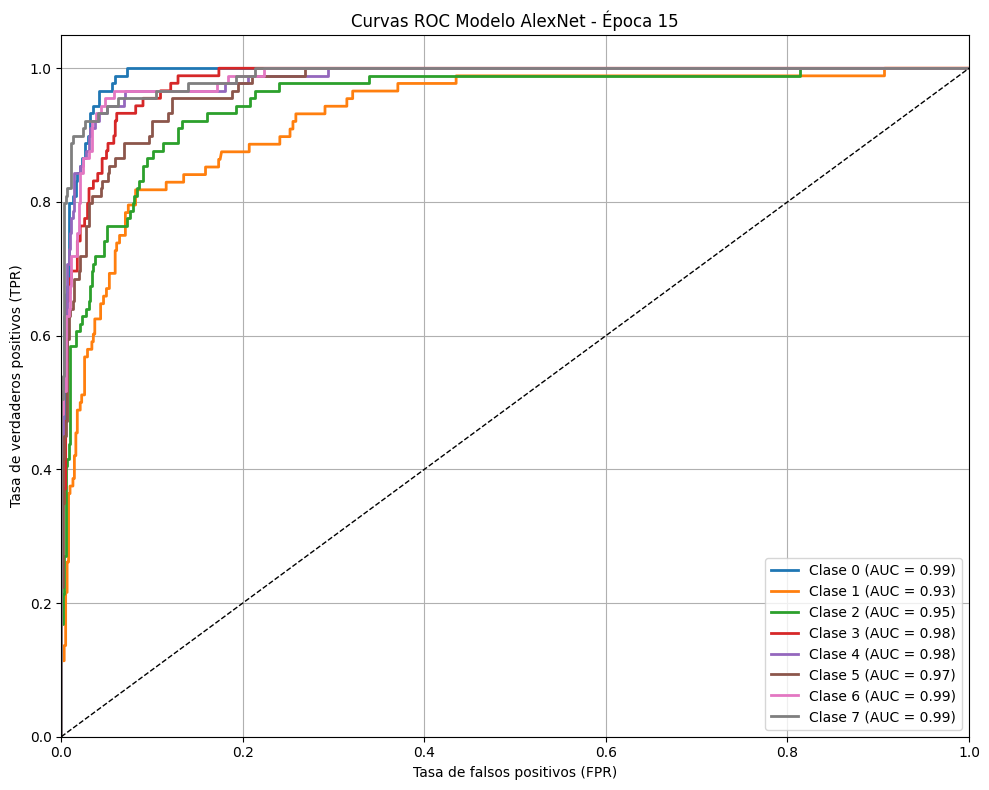

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_alexnet_4b, classes=list(range(num_classes)))
y_score = np.array(prob_alexnet_4b)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo AlexNet - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


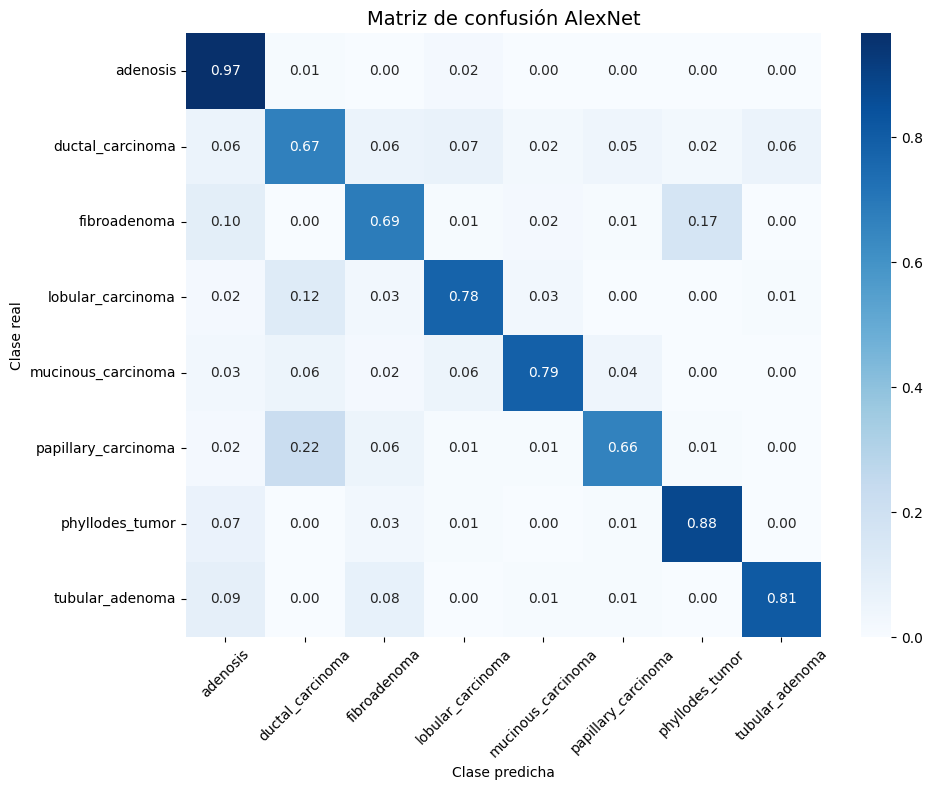

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_alexnet_4b, pred_labels_alexnet_4b)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión AlexNet", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

